In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Deteccion de Contornos Canny**

In [59]:
from __future__ import print_function
from matplotlib import pyplot as plt
import cv2

In [17]:
ruta='/content/drive/MyDrive/billie_1.jpeg'

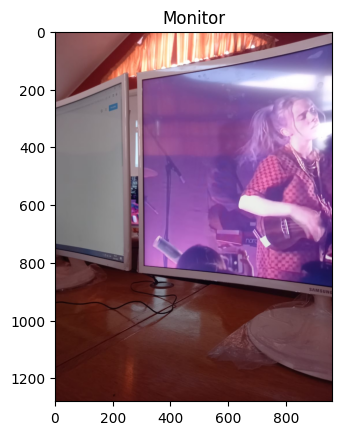

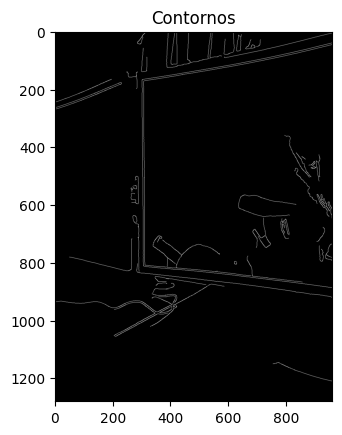

In [60]:
img = cv2.imread(ruta)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(img_gray, (11, 11), 0)

img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title("Monitor")
plt.imshow(img_cvt)
plt.show()

edged = cv2.Canny(blurred, 30, 150)
img_cvt = cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
plt.title("Contornos")
plt.imshow(img_cvt)
plt.show()


**un platano**

In [20]:
ruta1='/content/drive/MyDrive/platano.jpeg'

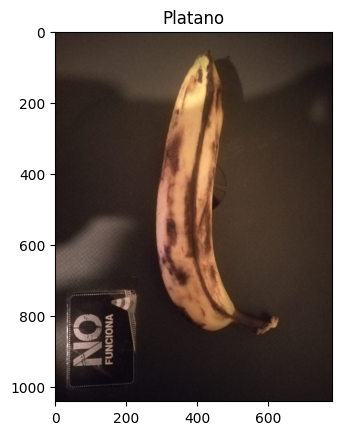

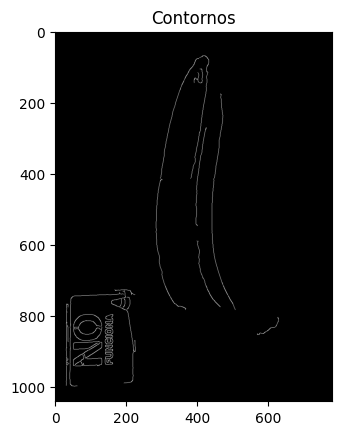

In [58]:
img = cv2.imread(ruta1)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(img_gray, (11, 11), 0)

img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title("Platano")
plt.imshow(img_cvt)
plt.show()

edged = cv2.Canny(blurred, 30, 150)
img_cvt = cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
plt.title("Contornos")
plt.imshow(img_cvt)
plt.show()


In [61]:
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contamos {} monedas en la imagen.".format(len(cnts)))


Contamos 72 monedas en la imagen.


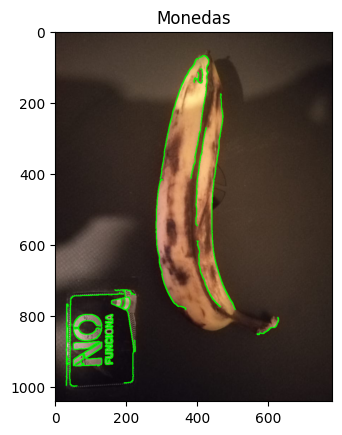

In [23]:
coins = img.copy()
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)
img_cvt = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)
plt.title("Monedas")
plt.imshow(img_cvt)
plt.show()


**Hoja de Burbujas**

In [63]:
import imutils
import cv2
import numpy as np
from matplotlib import pyplot as plt
from imutils.perspective import four_point_transform
from imutils import contours

In [64]:
ANSWER_KEY = {0: 0, 1: 3, 2: 2, 3: 3, 4: 1, 5: 0, 6: 3, 7: 4, 8: 0, 9: 0, 10: 2, 11: 1,
               12: 2, 13: 1, 14: 1, 15: 0, 16: 1, 17: 1, 18: 4, 19: 0}

img = cv2.imread('/content/drive/MyDrive/input63.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 75, 200)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
doc_contour = None

In [65]:
if len(cnts)>0:
  cnts=sorted(cnts,key=cv2.contourArea,reverse=True)
  for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    #si tiene
    if len(approx) == 4:
        doc_contour = approx
        break

In [66]:
paper = four_point_transform(img, doc_contour.reshape(4, 2))
warped = four_point_transform(gray, doc_contour.reshape(4, 2))
#Aplicar el umbral de Otsu
thresh = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
question_contours = []

In [67]:
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    aspect_ratio = w / float(h)
    if w >= 20 and h >= 20 and 0.9 <= aspect_ratio <= 1.1:
        question_contours.append(c)

question_contours = contours.sort_contours(question_contours, method="top-to-bottom")[0]
correct=0


In [68]:
#cada pregunta tiene 5 respuestas posibles
for (q, i) in enumerate(np.arange(0, len(question_contours), 5)):
    bubble_contours = contours.sort_contours(question_contours[i:i + 5], 5)[0]
    bubbled = None
    for (j, c) in enumerate(bubble_contours):
        mask = np.zeros(thresh.shape, dtype="uint8")
        cv2.drawContours(mask, [c], -1, 255, -1)
        mask = cv2.bitwise_and(thresh, thresh, mask=mask)
        total = cv2.countNonZero(mask)
        if bubbled is None or total > bubbled[0]:
            bubbled = (total, j)
    color = (0, 0, 255)
    k = ANSWER_KEY[q]
    if k == bubbled[1]:
        color = (0, 255, 0)  # VERDE
        correct += 1
    cv2.drawContours(paper, [bubble_contours[k]], -1, color, 3)

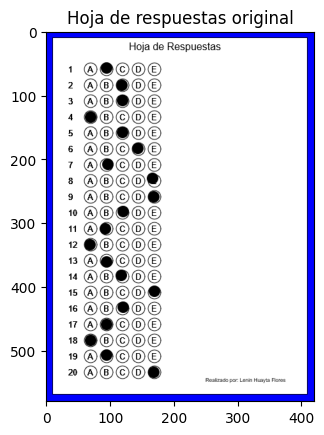

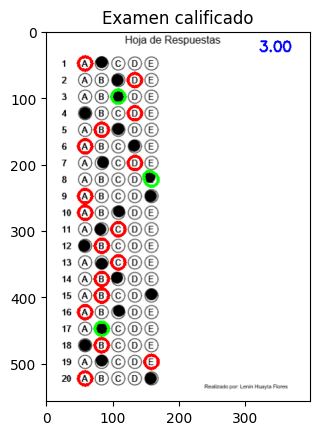

In [72]:
#tomar el examinado
score = correct * 1.0
cv2.putText(paper, "{:.2f}".format(score), (320, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('Hoja de respuestas original')
plt.imshow(img_cvt)
plt.show()

paper_cvt = cv2.cvtColor(paper, cv2.COLOR_BGR2RGB)
plt.title('Examen calificado')
plt.imshow(paper_cvt)
plt.show()